In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

#try:
#  %tensorflow_version 2.x  # Colab only.
#except Exception:
#  pass

import tensorflow as tf
print(tf.__version__)

2.6.0


In [2]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

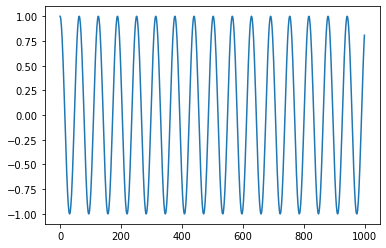

In [3]:
# 原始資料
series = np.cos(0.1*np.arange(1000)) #+ np.random.randn(1000)*0.1

# 繪圖
plt.plot(series)
plt.show()

In [4]:
### 由原始資料建立RNN輸入
# 嘗試用過去的T值預測下一T值
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (990, 10, 1) Y.shape (990,)


In [5]:
### 建模/編譯
i = Input(shape=(T, 1))
x = SimpleRNN(15, activation='relu')(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.001),
)

# 訓練 RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/80
16/16 [==============================] - 4s 32ms/step - loss: 0.6264 - val_loss: 0.4611
Epoch 2/80
16/16 [==============================] - 0s 16ms/step - loss: 0.3696 - val_loss: 0.2712
Epoch 3/80
16/16 [==============================] - 0s 16ms/step - loss: 0.2197 - val_loss: 0.1628
Epoch 4/80
16/16 [==============================] - 0s 15ms/step - loss: 0.1398 - val_loss: 0.1130
Epoch 5/80
16/16 [==============================] - 0s 16ms/step - loss: 0.0983 - val_loss: 0.0798
Epoch 6/80
16/16 [==============================] - 0s 17ms/step - loss: 0.0689 - val_loss: 0.0554
Epoch 7/80
16/16 [==============================] - 0s 15ms/step - loss: 0.0469 - val_loss: 0.0340
Epoch 8/80
16/16 [==============================] - 0s 16ms/step - loss: 0.0271 - val_loss: 0.0193
Epoch 9/80
16/16 [==============================] - 0s 18ms/step - loss: 0.0151 - val_loss: 0.0104
Epoch 10/80
16/16 [==============================] - 0s 16ms/step - loss: 0.0083 - val_loss: 0.0060
Epoch 11/

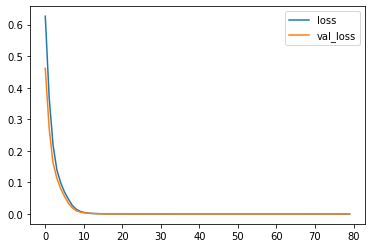

In [6]:
# 繪迭代損失曲線
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [7]:
# 用真實目標預測

validation_target = Y[-N//2:]
validation_predictions = []

# 用第一驗證輸入當索引
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1, 1))[0,0] # 1x1 array -> scalar
  i += 1
  
  # 更新預測列表
  validation_predictions.append(p)

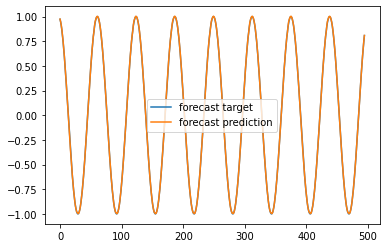

In [8]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [9]:
# 用自我預測去預測未來

validation_target = Y[-N//2:]
validation_predictions = []

# 首先驗證輸入
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1, 1))[0,0] # 1x1 array -> scalar
  
  # 更新預測列表
  validation_predictions.append(p)
  
  # 產生新輸入資料
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

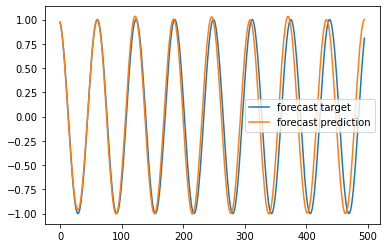

In [ ]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()